In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

In [2]:
starttime = t.time()

data = dp.getXYdata_wYerr('data/nord-diskcurve.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
#v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#Express as weights
weighdata = 1/v_err1

In [3]:
#Only Disk, All Parameters
def d(r,pref,h):
    return nf.d_v(r,pref,h,load=True)

#Only Disk, Only Prefactor
def d2(r,pref):
    return pref*nf.d_v(r,load=True)


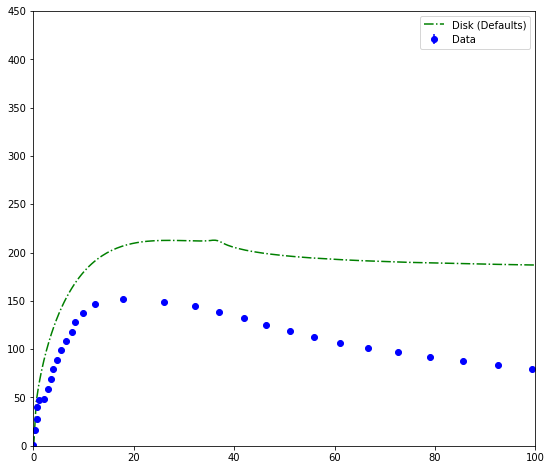

In [4]:
#Plot default

fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,100)
plt.ylim(0,450)

r_plot = np.linspace(0.1,100,200)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_plot,nf.d_v(r_plot),'g-.',label='Disk (Defaults)')

plt.legend()
plt.show()

In [5]:
#Fit, D Only, All Parameters

#Setup
d_mod = lm.Model(d)
d_params = d_mod.make_params()
#Disk Params
d_params.add('h', value=nf.h_c)
d_params.add('pref', value=0.3)
#Do fit
d_fit = d_mod.fit(v_dat,d_params,r=r_dat,weights=weighdata)

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [6]:
#Fit, D Only, Only Prefactor

#Setup
d2_mod = lm.Model(d2)
d2_params = d2_mod.make_params()
#Disk Params
d2_params.add('pref', value=0.3)
#Do fit
d2_fit = d2_mod.fit(v_dat,d2_params,r=r_dat,weights=weighdata)

In [7]:
print('Fit information for single-component fit (All Parameters):')
d_fit

Fit information for single-component fit (All Parameters):


In [8]:
print('Fit information for single-component fit (Only Prefactor):')
d2_fit

Fit information for single-component fit (Only Prefactor):


In [9]:
# Defining for the plots
d_dict = d_fit.best_values
d_h = d_dict['h']
d_pref = d_dict['pref']

d2_dict = d2_fit.best_values
d2_pref = d2_dict['pref']

d_curve = d(r_plot,d_pref,d_h)
d2_curve = d2(r_plot,d2_pref)

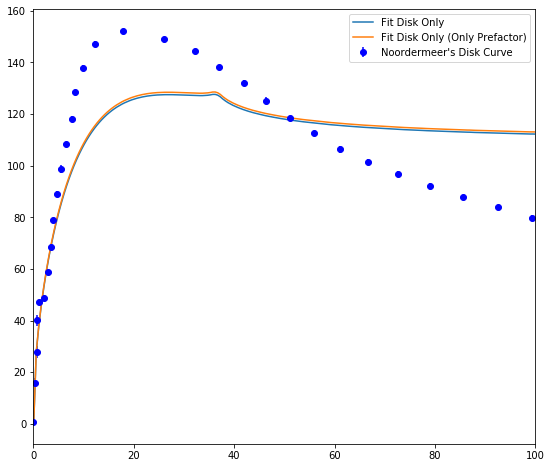

In [10]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,100)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label="Noordermeer's Disk Curve")
plt.plot(r_plot,d_curve,label='Fit Disk Only')
plt.plot(r_plot,d2_curve,label='Fit Disk Only (Only Prefactor)')
#plt.plot(r_plot,nf.d_v(r_plot,load=True,path='../'),'g-.',label='Disk (Defaults)')

plt.legend()
plt.show()

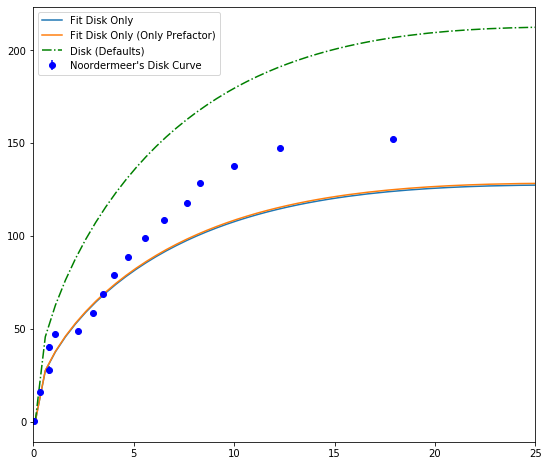

In [11]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,25)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label="Noordermeer's Disk Curve")
plt.plot(r_plot,d_curve,label='Fit Disk Only')
plt.plot(r_plot,d2_curve,label='Fit Disk Only (Only Prefactor)')
plt.plot(r_plot,nf.d_v(r_plot,load=True),'g-.',label='Disk (Defaults)')

plt.legend()
plt.show()

In [12]:
endtime = t.time()
print('Total Time:')
print(str(endtime - starttime)+' seconds')
print('')

print('Timestamp:')
print(datetime.now())

Total Time:
1468.0891251564026 seconds

Timestamp:
2019-11-10 20:59:48.358799
